In [1]:
# Generally required modules
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pickle
import sys

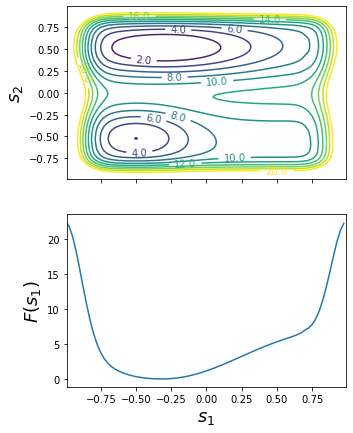

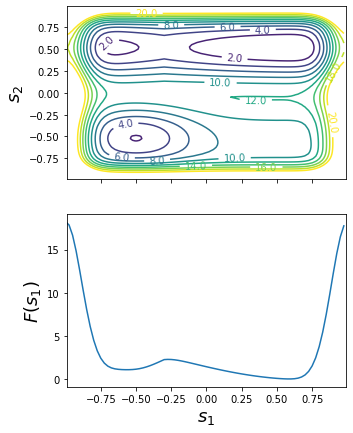

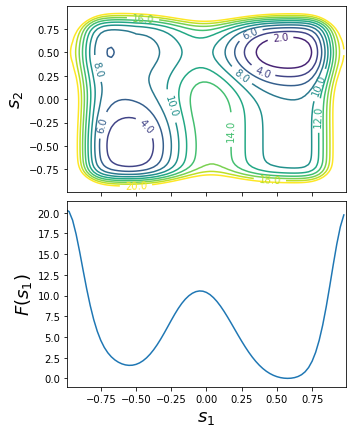

In [2]:



# grids
delta = 0.025
x = np.arange(-1, 1, delta)
y = np.arange(-1, 1, delta)
X, Y = np.meshgrid(x, y)

# parameters
barrier=4
#barrier=6

def pbc(x):
    """Brings x within -1 and 1"""
    return np.remainder(x+1,2)-1

def boundaries(x,y):
    """Boundaries are added to keep the system within -1,1 at the beginning of the simulation"""
    return (
         18*np.exp(-(pbc(y-1)/0.16)**2) +
         18*np.exp(-(pbc(x-1)/0.16)**2)
    )

def func1(x,y):
    """Most difficult function: CV does not distinguish R and P"""
    B= barrier*np.exp(- ((y)/0.3)**2)
    above=0.5*(1+np.sin(y*np.pi))
    below=1-above
    R=below* -7*np.exp(-(pbc(x+0.5)/0.4)**2 - (pbc(y+0.5)/0.4)**2)
    P=above* -9*np.exp(-(pbc(x+0.3)/0.8)**2 - (pbc(y-0.5)/0.4)**2)
    return (boundaries(x,y)+B+R+P)
   
def func2(x,y):
    """Intermediate case: CV distinguishes R and P but not TS"""
    B= barrier*np.exp(- ((y)/0.3)**2)
    above=0.5*(1+np.sin(y*np.pi))
    below=1-above
    R=below* -7*np.exp(-(pbc(x+0.5)/0.4)**2 - (pbc(y+0.5)/0.4)**2)
    P=above* -9*np.exp(-(pbc(x-0.7)/1.6)**2 - (pbc(y-0.5)/0.4)**2)
    return (boundaries(x,y)+B+R+P)

# Ideal case: CV distinguish R, P and TS
def func3(x,y):
    """Ideal case: CV distinguishes R, P and TS.
    
       Barrier on x is made 3x larger wrt func2
    """
    B= 2*barrier*np.exp(- ((x)/0.3)**2)
    above=0.5*(1+np.sin(y*np.pi))
    below=1-above
    R=below* -7*np.exp(-(pbc(x+0.5)/0.4)**2 - (pbc(y+0.5)/1)**2)
    P=above* -9*np.exp(-(pbc(x-0.5)/0.8)**2 - (pbc(y-0.5)/0.4)**2)
    #P=above* -9*np.exp(-(pbc(x-0.7)/1)**2 - (pbc(y-0.5)/0.4)**2)
    return (boundaries(x,y)+B+R+P)


def plot(ax,X,Y,Z,x):

    CS=ax[0].contour(X,Y,Z-np.min(Z),levels=np.linspace(0,20,11))
    ax[0].clabel(CS,inline=1, fontsize=10,fmt="%2.1f")
    ax[0].set_ylabel("$s_2$",fontsize=18)
    ax[1].set_ylabel("$F(s_1)$",fontsize=18)
    proj=-np.log(np.sum(np.exp(-Z),axis=0))
    ax[1].plot(x,proj-np.min(proj))
    Zb=Z.copy()
    ax[0].set_xlim([-0.99,0.99])
    ax[0].set_ylim([-0.99,0.99])

    ax[1].set_xlim([-0.99,0.99])
    ax[1].set_xlabel("$s_1$",fontsize=18)
    for i in Zb:
        i-=proj[:]


fig, ax = plt.subplots(2,1,figsize=(5,7),sharex=True)
plot((ax[0],ax[1]),X,Y,func1(x,Y),x)
fig, ax = plt.subplots(2,1,figsize=(5,7),sharex=True)
plot((ax[0],ax[1]),X,Y,func2(x,Y),x)
fig, ax = plt.subplots(2,1,figsize=(5,7),sharex=True)
plot((ax[0],ax[1]),X,Y,func3(x,Y),x)

fig.subplots_adjust(wspace=0.05, hspace=0.05)

plt.show()

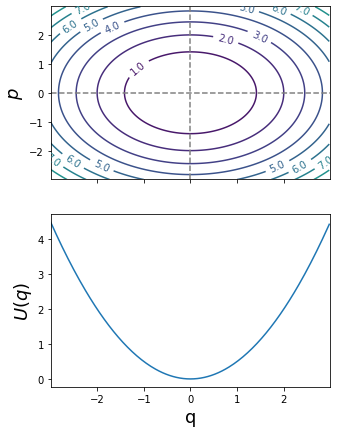

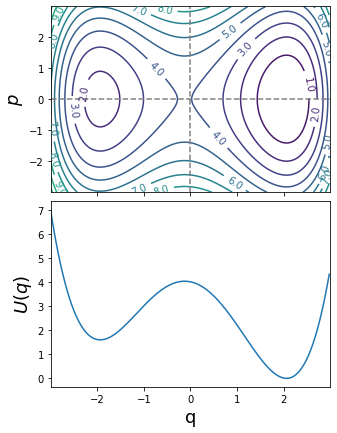

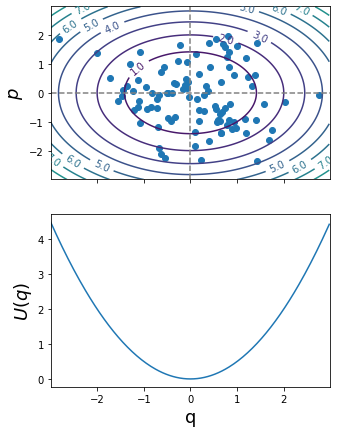

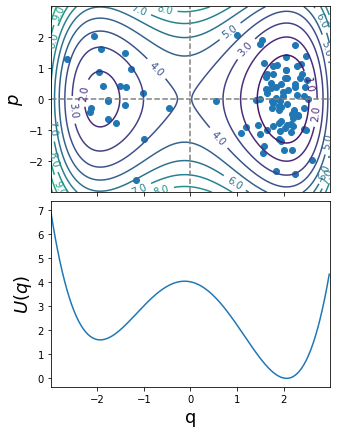

In [3]:
delta = 0.025
x = np.arange(-3, 3, delta)
y = np.arange(-3, 3, delta)
X, Y = np.meshgrid(x, y)


def plot(ax,X,Y,Z,x,points=0):

    CS=ax[0].contour(X,Y,Z-np.min(Z),levels=np.linspace(0,16,17))
    ax[0].clabel(CS,inline=1, fontsize=10,fmt="%2.1f")
    ax[0].set_ylabel("$p$",fontsize=18)
    ax[1].set_ylabel("$U(q)$",fontsize=18)
    proj=-np.log(np.sum(np.exp(-Z),axis=0))
    ax[1].plot(x,proj-np.min(proj))
    Zb=Z.copy()
    ax[0].set_xlim([-2.99,2.99])
    ax[0].set_ylim([-2.99,2.99])

    ax[1].set_xlim([-2.99,2.99])
    ax[1].set_xlabel("q",fontsize=18)
    
    ax[0].axhline(y=0, linestyle="--",color="gray")
    ax[0].axvline(x=0, linestyle="--",color='gray')
    for i in Zb:
        i-=proj[:]
        

    P=np.exp(-(Z-np.min(Z))).flatten()
    P/=np.sum(P)
    x=[]
    y=[]
    for i in np.random.choice(len(P),size=points,p=P.flatten()):
        x.append(X.flatten()[i])
        y.append(Y.flatten()[i])
    ax[0].scatter(x,y)
        
    

def func1(x,y):
    return 0.5*(x**2+y**2)
def func2(x,y):
    return 0.5*(-3.2*x**2+0.4*x**4+y**2-0.8*x)
fig, ax = plt.subplots(2,1,figsize=(5,7),sharex=True)
plot((ax[0],ax[1]),X,Y,func1(x,Y),x)
fig, ax = plt.subplots(2,1,figsize=(5,7),sharex=True)
plot((ax[0],ax[1]),X,Y,func2(x,Y),x)

fig.subplots_adjust(wspace=0.05, hspace=0.05)

plt.show()

fig, ax = plt.subplots(2,1,figsize=(5,7),sharex=True)
plot((ax[0],ax[1]),X,Y,func1(x,Y),x,points=100)
fig, ax = plt.subplots(2,1,figsize=(5,7),sharex=True)
plot((ax[0],ax[1]),X,Y,func2(x,Y),x,points=100)

fig.subplots_adjust(wspace=0.05, hspace=0.05)

plt.show()
